# Training the Sign Language Recognition

### Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2
import pydot

### To allow the code working on GPU instead CPU

In [2]:
gpu = tf.config.experimental.list_physical_devices('GPU')

In [3]:
#load_dataset function to load the data and resize the images to 50x50
def load_dataset(directory):
  images = []
  labels = []
  for idx, label in enumerate(uniq_labels):
    for file in os.listdir(directory + '/'+label):
      filepath = directory +'/'+ label + "/" + file
      img = cv2.resize(cv2.imread(filepath),(50,50))
      images.append(img)
      labels.append(idx)
  images = np.asarray(images)
  labels = np.asarray(labels)
  return images, labels

In [4]:
#display_images function to show examples
def display_images(x_data,y_data, title, display_label = True):
    x, y = x_data,y_data
    fig, axes = plt.subplots(5, 8, figsize = (18, 5))
    fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
    fig.suptitle(title, fontsize = 18)
    for i, ax in enumerate(axes.flat):
        ax.imshow(cv2.cvtColor(x[i], cv2.COLOR_BGR2RGB))
        if display_label:
            ax.set_xlabel(uniq_labels[y[i]])
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [5]:
#loading_dataset into X_pre and Y_pre
data_dir = r'D:\College\Semester-VI\Computer Vision\Project\Sign-Language-Recognition\data_dir'
uniq_labels = sorted(os.listdir(data_dir))
X_pre, Y_pre = load_dataset(data_dir)
print(X_pre.shape, Y_pre.shape)

(37500, 50, 50, 3) (37500,)


In [6]:
#spliting dataset into 80% train, 10% validation and 10% test data
X_train, X_test, Y_train, Y_test = train_test_split(X_pre, Y_pre, test_size = 0.8)
X_test, X_eval, Y_test, Y_eval = train_test_split(X_test, Y_test, test_size = 0.5)

In [7]:
# %matplotlib notebook

Train images shape (7500, 50, 50, 3) (7500,)
Test images shape (15000, 50, 50, 3) (15000,)
Evaluate image shape (15000, 50, 50, 3) (15000,)
Printing the labels ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'znothing'] 25


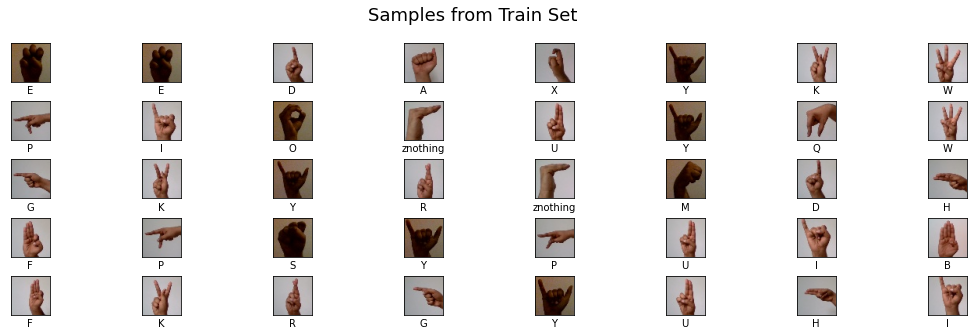

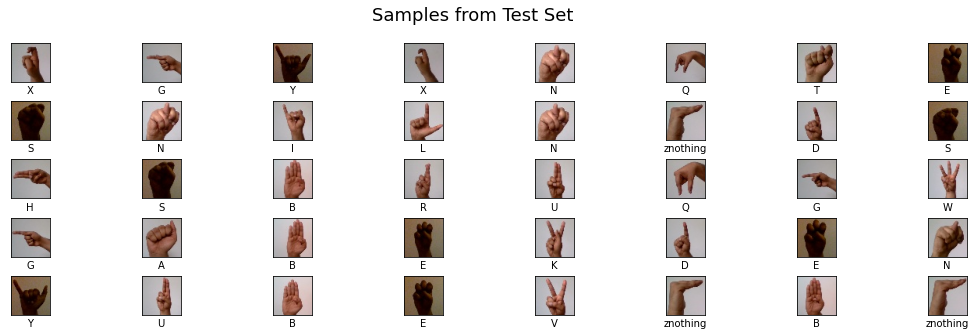

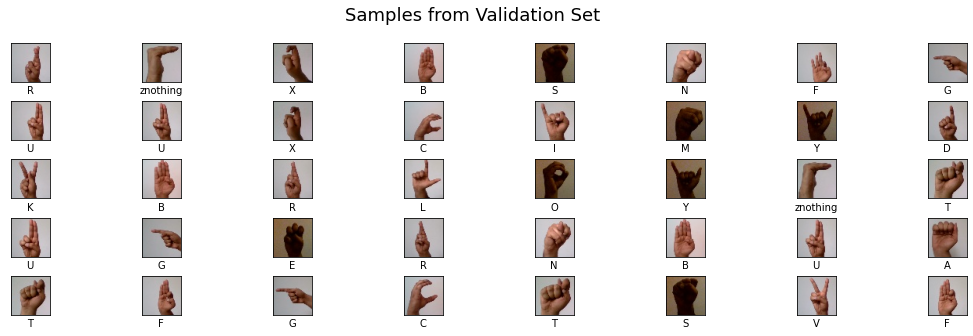

In [8]:
#print shapes and show examples for each set
print("Train images shape",X_train.shape, Y_train.shape)
print("Test images shape",X_test.shape, Y_test.shape)
print("Evaluate image shape",X_eval.shape, Y_eval.shape)
print("Printing the labels",uniq_labels, len(uniq_labels))
display_images(X_train,Y_train,'Samples from Train Set')
display_images(X_test,Y_test,'Samples from Test Set')
display_images(X_eval,Y_eval,'Samples from Validation Set')

In [9]:
# converting Y_tes and Y_train to One hot vectors using to_categorical
# example of one hot => '1' is represented as [0. 1. 0. . . . . 0.]
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_eval = to_categorical(Y_eval)
X_train = X_train / 255.
X_test = X_test/ 255.
X_eval = X_eval/ 255.

In [10]:
# building our model
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu', input_shape=(50,50,3)),
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(25, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 16)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        4640      
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 32)        9248      
                                                        

In [11]:
#compiling the model
#default batch size 32
#default learning rate is 0.001
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

In [12]:
#start training(fitting) the data
history = model.fit(X_train, Y_train, epochs=20, verbose=1,
                validation_data=(X_eval, Y_eval))

Epoch 1/20
235/235 [==============================] - 65s 259ms/step - loss: 1.1873 - accuracy: 0.6299 - val_loss: 0.2978 - val_accuracy: 0.9073
Epoch 2/20
235/235 [==============================] - 70s 297ms/step - loss: 0.2051 - accuracy: 0.9340 - val_loss: 0.1293 - val_accuracy: 0.9621
Epoch 3/20
235/235 [==============================] - 60s 257ms/step - loss: 0.0661 - accuracy: 0.9776 - val_loss: 0.0601 - val_accuracy: 0.9831
Epoch 4/20
235/235 [==============================] - 56s 239ms/step - loss: 0.0698 - accuracy: 0.9773 - val_loss: 0.1017 - val_accuracy: 0.9642
Epoch 5/20
235/235 [==============================] - 57s 245ms/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0316 - val_accuracy: 0.9884
Epoch 6/20
235/235 [==============================] - 63s 267ms/step - loss: 0.0667 - accuracy: 0.9820 - val_loss: 0.0403 - val_accuracy: 0.9871
Epoch 7/20
235/235 [==============================] - 65s 279ms/step - loss: 0.0299 - accuracy: 0.9915 - val_loss: 0.0155 - val_ac

In [13]:
#testing
model.evaluate(X_test, Y_test)

469/469 [==============================] - 14s 28ms/step - loss: 0.0014 - accuracy: 0.9995


[0.0014302299823611975, 0.9995333552360535]

In [24]:
#save the model
model.save(r'D:\College\Semester-VI\Computer Vision\Project\Sign-Language-Recognition\CS4111_CVmodel')

INFO:tensorflow:Assets written to: D:\College\Semester-VI\Computer Vision\Project\Sign-Language-Recognition\CS4111_CVmodel\assets


In [25]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

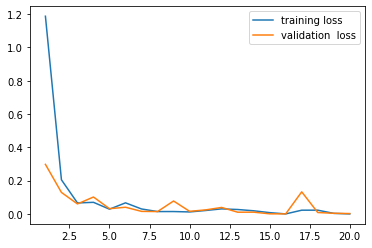

In [27]:
#ploting training and validation loss vs. epochs
# %matplotlib notebook
epochs = list(range(1,21))
plt.plot(epochs, train_loss, label = "training loss")
plt.plot(epochs, val_loss, label = "validation  loss")
plt.legend()
plt.show()

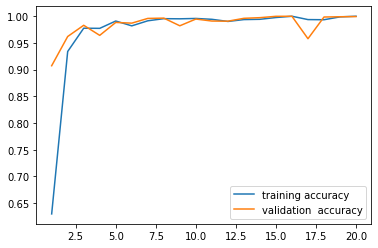

In [28]:
#ploting training and validation accuracy vs. epochs
# %matplotlib notebook
plt.plot(epochs, train_acc, label = "training accuracy")
plt.plot(epochs, val_accuracy, label = "validation  accuracy")
plt.legend()
plt.show()